In [1]:
# create a functio to print hello
function hello()
    println("hello")
end

hello (generic function with 1 method)

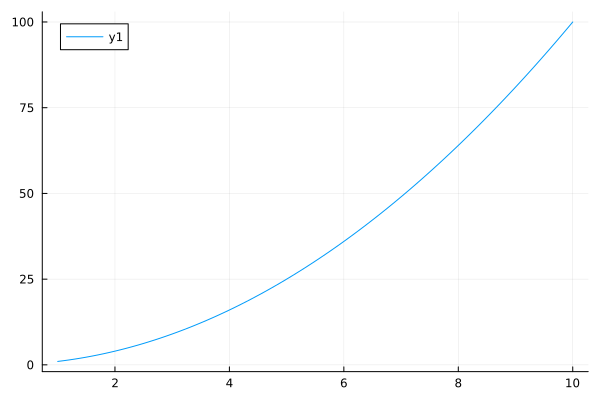

In [3]:
# define a function to plot a graph
using Plots

# plot a graph of y = x^2
function plot_graph()
    x = 1:0.1:10
    y = x.^2
    plot(x, y)
end

# call the functions
plot_graph()

# Set up

## Get Asset Price Data

I will use AlphaVantage to get asset price data.

To interact with the API, I will need to install an HTTP client package in Julia. One popular package is HTTP.jl, which provides a simple and flexible interface for making HTTP requests.

I  install it by running the following command in the Julia REPL:
```
using Pkg
Pkg.add("HTTP")
```

In [18]:
using Pkg
Pkg.add("HTTP")
Pkg.add("JSON")
Pkg.add("DataFrames")
Pkg.add("Dates")

I need to make an HTTP request to the API to retrieve the data. Parse it using JSON.jl, and then convert it to a DataFrame using DataFrames.jl.

In [17]:
using HTTP
using JSON
using DataFrames
using Dates

api_key = "5OCY34XT90XG8JYD"


endpoint = "https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol=VOO&apikey=$api_key&outputsize=full"

# Get today's date as a string in YYYY-MM-DD format
today = Dates.format(now(), "yyyy-mm-dd")

# Set the start date to January 1st, 2022
start_date = "2022-01-01"

# Modify the endpoint URL to include the start and end dates
endpoint *= "&start_date=$start_date&end_date=$today"

response = HTTP.get(endpoint)

if response.status == 200
    # Handle the response data here
    data = String(response.body)
else
    error("API request failed with status code: $(response.status)")
end

data = JSON.parse(data)



UndefVarError: UndefVarError: Dates not defined

The output you have is a nested dictionary that contains the daily time series data for the VOO ETF. To make it more readable, you can use the println() function to print the dictionary contents to the console in a more user-friendly way.


In [16]:
# Print the time series data
for (key, value) in data["Time Series (Daily)"]
    println("Date: $key")
    println("Open: $(value["1. open"])")
    println("High: $(value["2. high"])")
    println("Low: $(value["3. low"])")
    println("Close: $(value["4. close"])")
    println("Adjusted Close: $(value["5. adjusted close"])")
    println("Volume: $(value["6. volume"])")
    println("Split Coefficient: $(value["8. split coefficient"])")
    println("Dividend Amount: $(value["7. dividend amount"])")
    println("=========================================")
end

Date: 2022-12-14
Open: 369.1
High: 372.8
Low: 364.25
Close: 367.16
Adjusted Close: 363.924146002164
Volume: 4707115
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2023-02-06
Open: 376.575
High: 377.93
Low: 375.02
Close: 376.66
Adjusted Close: 375.125284004214
Volume: 2880098
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2023-01-27
Open: 370.89
High: 375.08
Low: 370.76
Close: 372.87
Adjusted Close: 371.350726508393
Volume: 5549522
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2023-01-13
Open: 361.6807
High: 366.7297
Low: 361.47
Close: 366.23
Adjusted Close: 364.737781449751
Volume: 3015160
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2022-11-21
Open: 362.77
High: 363.7386
Low: 360.87
Close: 362.71
Adjusted Close: 359.513364735933
Volume: 2397875
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2023-03-29
Open: 367.4
High: 368.94
Low: 366.29
Close: 368.69
Adjusted Close: 368.69
Volume: 3636069
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2023-02-27

Dividend Amount: 0.0000
Date: 2023-01-11
Open: 360.41
High: 363.51
Low: 359.66
Close: 363.45
Adjusted Close: 361.969108669176
Volume: 5710532
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2023-03-02
Open: 360.81
High: 366.36
Low: 360.53
Close: 365.49
Adjusted Close: 364.000796608879
Volume: 2730814
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2022-11-23
Open: 367.21
High: 370.3599
Low: 367.0225
Close: 369.84
Adjusted Close: 366.580526629917
Volume: 2590859
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2022-11-17
Open: 358.8
High: 362.99
Low: 358.565
Close: 362.39
Adjusted Close: 359.196184959485
Volume: 3284424
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2023-04-03
Open: 375.6
High: 377.91
Low: 375.22
Close: 377.56
Adjusted Close: 377.56
Volume: 3525296
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2023-03-08
Open: 366.11
High: 367.2987
Low: 364.44
Close: 366.55
Adjusted Close: 365.056477597156
Volume: 2906258
Split Coefficient: 1.0
Dividend Amount

Volume: 5325447
Split Coefficient: 1.0
Dividend Amount: 0.0000
